In [1]:
import function as f
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
folder_path = 'results'
y_col = ['Congestion_ratio_AVG']

congestion_ratio_avg_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])
congestion_ratio_avg_new_dfs = {}
# Initialize an empty DataFrame to store the results
congestion_ratio_avg_merged_df = pd.DataFrame()

for df_name, df in congestion_ratio_avg_dfs:
    
    Number_of_YT = int(df['Prev Truck Number'].unique()[0]) + int(df['Now Truck Number'].unique()[0])
    grouped_df = df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])['Congestion_ratio_AVG'].mean().reset_index()
    grouped_df['Number_of_YTs'] = Number_of_YT
    congestion_ratio_avg_new_dfs[df_name] = grouped_df
    
    congestion_ratio_avg_merged_df = pd.concat([congestion_ratio_avg_merged_df, grouped_df], ignore_index=True)

print(congestion_ratio_avg_merged_df)
    

Remove outliers by  Congestion_ratio_AVG !
    alpha_1  alpha_2  alpha_3  Congestion_ratio_AVG  Number_of_YTs
0         0        0      100              0.030837             10
1        10       80       10              0.033178             10
2        20       70       10              0.032161             10
3        30       60       10              0.033367             10
4        40       50       10              0.034532             10
..      ...      ...      ...                   ...            ...
94       40       50       10              0.362761             60
95       50       40       10              0.347118             60
96       60       30       10              0.357249             60
97       70       20       10              0.361877             60
98       80       10       10              0.344955             60

[99 rows x 5 columns]


In [3]:
congestion_ratio_avg_merged_df.sort_values(by=['Number_of_YTs', 'Congestion_ratio_AVG']).groupby('Number_of_YTs').head(3)['alpha_1'].value_counts()

20    8
10    7
30    5
80    4
50    3
40    2
70    2
60    1
0     1
Name: alpha_1, dtype: int64

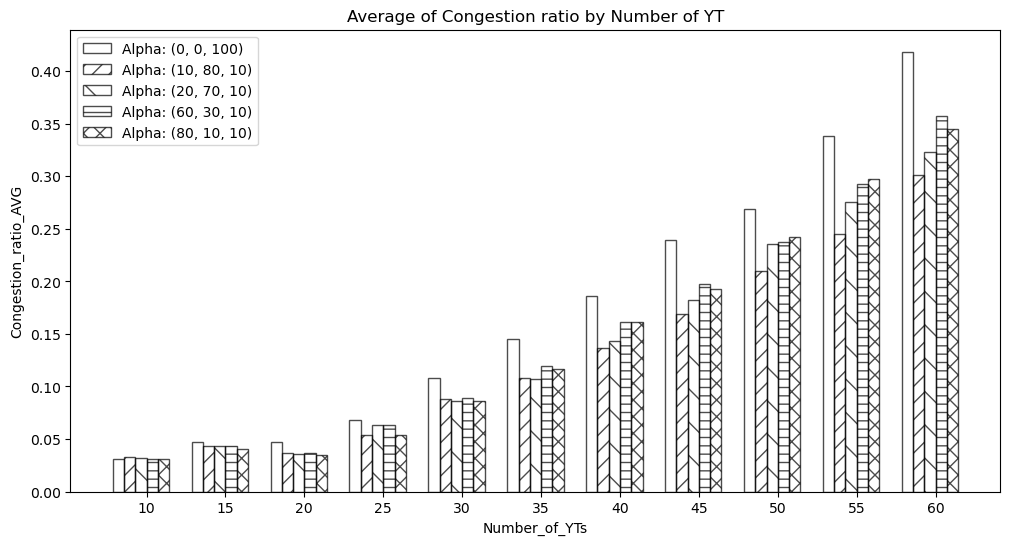

In [4]:
x_col_name = 'Number_of_YTs'
y_col_name = 'Congestion_ratio_AVG'
title = 'Average of Congestion ratio by Number of YT'

alpha_1_list = [0, 10, 20, 60, 80]

# Filter the DataFrame based on 'alpha_1_list'
filtered_df = congestion_ratio_avg_merged_df[congestion_ratio_avg_merged_df['alpha_1'].isin(alpha_1_list)]

f.bar_plot_hatch(filtered_df, x_col_name, y_col_name, title)

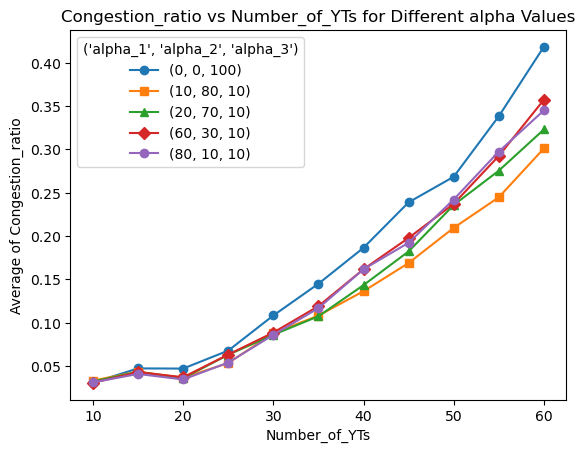

In [5]:
from itertools import cycle

# Group by 'alpha_1', 'alpha_2', 'alpha_3'
grouped_by_alpha = filtered_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

# Define a list of markers
markers = ['o', 's', '^', 'D']

# Use cycle to create a cycling iterator for markers
marker_cycle = cycle(markers)

# Plot each group with a different marker
for name, group in grouped_by_alpha:
    marker = next(marker_cycle)
    plt.plot(group['Number_of_YTs'], group['Congestion_ratio_AVG'], label=name, marker=marker)

# Set labels and title
plt.xlabel('Number_of_YTs')
plt.ylabel('Average of Congestion_ratio')
plt.title('Congestion_ratio vs Number_of_YTs for Different alpha Values')
plt.legend(title=('alpha_1', 'alpha_2', 'alpha_3'))
# plt.ylim(0, 1)

# Show the plot
plt.show()

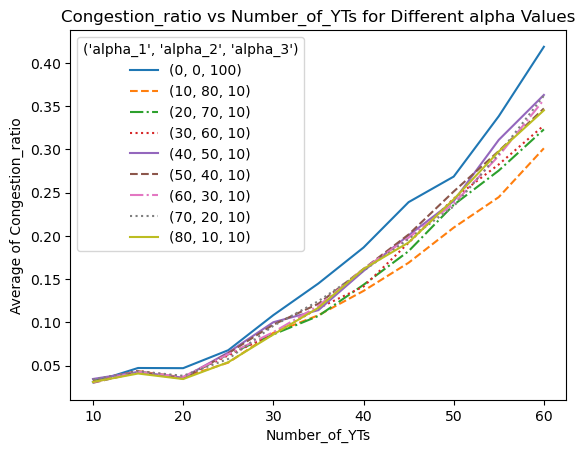

In [6]:
# Group by 'alpha_1', 'alpha_2', 'alpha_3'
grouped_by_alpha = congestion_ratio_avg_merged_df.groupby(['alpha_1', 'alpha_2', 'alpha_3'])

# Define a dictionary to map line styles to each group
line_styles = {
    (0, 0, 100): '-',
    (10, 80, 10): '--',
    (20, 70, 10): '-.',
    (30, 60, 10): ':',
    (40, 50, 10): '-',
    (50, 40, 10): '--',
    (60, 30, 10): '-.',
    (70, 20, 10): ':',
    (80, 10, 10): '-',
}

# Plot each group with the corresponding line style
for name, group in grouped_by_alpha:
    linestyle = line_styles.get(name, '-')  # Use a solid line if no specific style is defined
    plt.plot(group['Number_of_YTs'], group['Congestion_ratio_AVG'], label=name, linestyle=linestyle)

# Set labels and title
plt.xlabel('Number_of_YTs')
plt.ylabel('Average of Congestion_ratio')
plt.title('Congestion_ratio vs Number_of_YTs for Different alpha Values')
plt.legend(title=('alpha_1', 'alpha_2', 'alpha_3'))
# plt.ylim(0,1)
# Show the plot
plt.show()

In [38]:
folder_path = 'results'
y_col = ['Congestion_ratio', 'Truck_id', 'Completion_Time_alone', 'Completion_Time']

completion_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])

# Initialize an empty DataFrame to store the results
concat_df = pd.DataFrame()

for df_name, df in completion_dfs:
    shortest_df = df[(df['alpha_1'] == 0) & (df['alpha_2'] == 0) & (df['alpha_3'] == 100)]
    others_df = df[(df['alpha_1'] == 10) & (df['alpha_2'] == 80) & (df['alpha_3'] == 10)]
    
    # Merge DataFrames based on common columns
    merged_df = pd.merge(others_df, shortest_df[['repeat_num', 'Truck_id', 'Completion_Time_alone', 'Completion_Time']],
                         on=['repeat_num', 'Truck_id', 'Completion_Time_alone'],
                         suffixes=('_LP', '_shortest'))

    # Drop duplicates based on all columns
    merged_df = merged_df.drop_duplicates()
    
    concat_df = pd.concat([concat_df, merged_df], ignore_index=True)

# set string to float
concat_df['Completion_Time_alone'] = concat_df['Completion_Time_alone'].astype(float)
concat_df['Completion_Time_shortest'] = concat_df['Completion_Time_shortest'].astype(float)
concat_df['Completion_Time_LP'] = concat_df['Completion_Time_LP'].astype(float)

Remove outliers by  Congestion_ratio !
  Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  repeat_num  \
0                 5                5       10       80       10           1   
1                 5                5       10       80       10           1   
2                 5                5       10       80       10           1   
3                 5                5       10       80       10           1   
4                 5                5       10       80       10           1   

   Congestion_ratio   Truck_id  Completion_Time_alone  Completion_Time_LP  \
0          0.000186    Truck-4               341.2643             341.272   
1          0.115557    Truck-1               362.7704             370.024   
2          0.004066    Truck-0               395.0296             395.416   
3          0.099325    Truck-3               391.4453             400.528   
4         -0.022847  Truck-103               344.8487             343.824   

   Completion_Time_shor

In [44]:
yt_10_df = concat_df[(concat_df['Prev Truck Number'] == '5') & (concat_df['Now Truck Number'] == '5')]
yt_30_df = concat_df[(concat_df['Prev Truck Number'] == '15') & (concat_df['Now Truck Number'] == '15')]
yt_50_df = concat_df[(concat_df['Prev Truck Number'] == '25') & (concat_df['Now Truck Number'] == '25')]

random_num = 100

yt_10_random_df = yt_10_df.sample(n=random_num, random_state = 1).reset_index()
yt_30_random_df = yt_30_df.sample(n=random_num, random_state = 1).reset_index()
yt_50_random_df = yt_50_df.sample(n=random_num, random_state = 1).reset_index()

In [71]:
def completion_time_plot(_df, _x_label, _y_label, _title, _x_max):
    plt.figure(figsize=(60, 6))

    # Plot Completion_Time_alone against the index
    plt.plot(_df.index, _df['Completion_Time_alone'], label='Completion_Time_alone', linestyle='-', color = 'black')
    plt.plot(_df.index, _df['Completion_Time_shortest'], label='Completion_Time_shortest', linestyle='--', color = 'red')
    plt.plot(_df.index, _df['Completion_Time_LP'], label='Completion_Time_LP', linestyle='-.', color = 'blue')


    # Set labels and title
    plt.xlabel(_x_label, fontsize = 15)
    plt.ylabel(_y_label, fontsize = 15)
    plt.title(_title, fontsize = 20)

    # # Set the lower limit for the x-axis
    plt.xlim(xmin=0, xmax = _x_max)

    # Show the legend
    plt.legend(fontsize = 15, loc = 'upper right')

    plt.show()

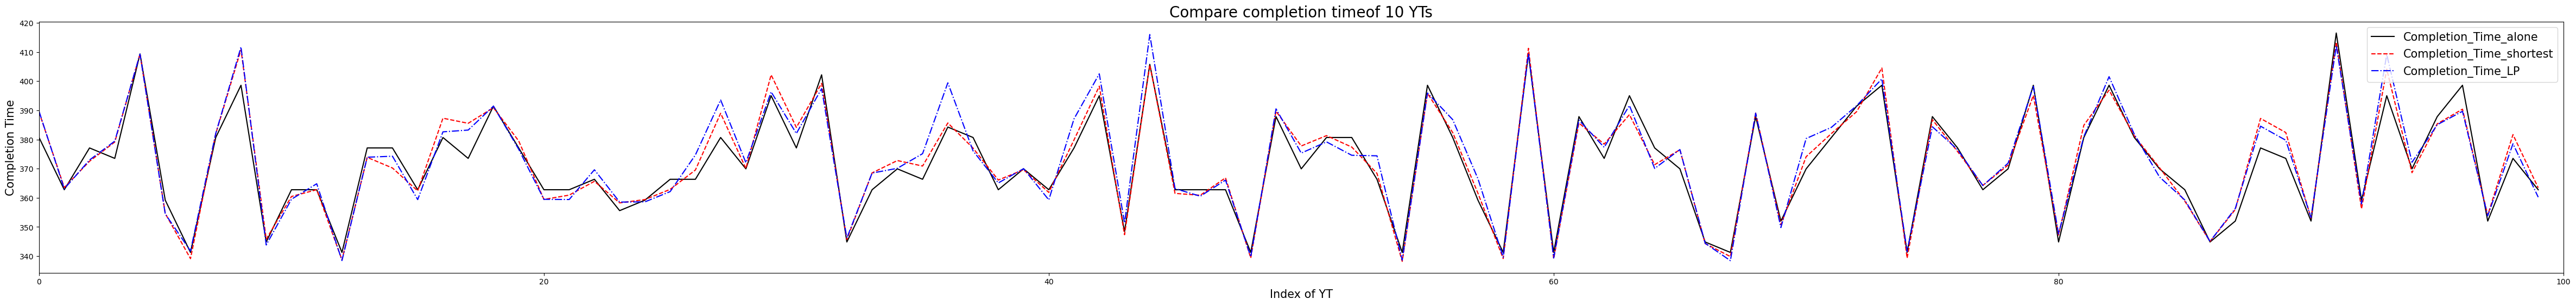

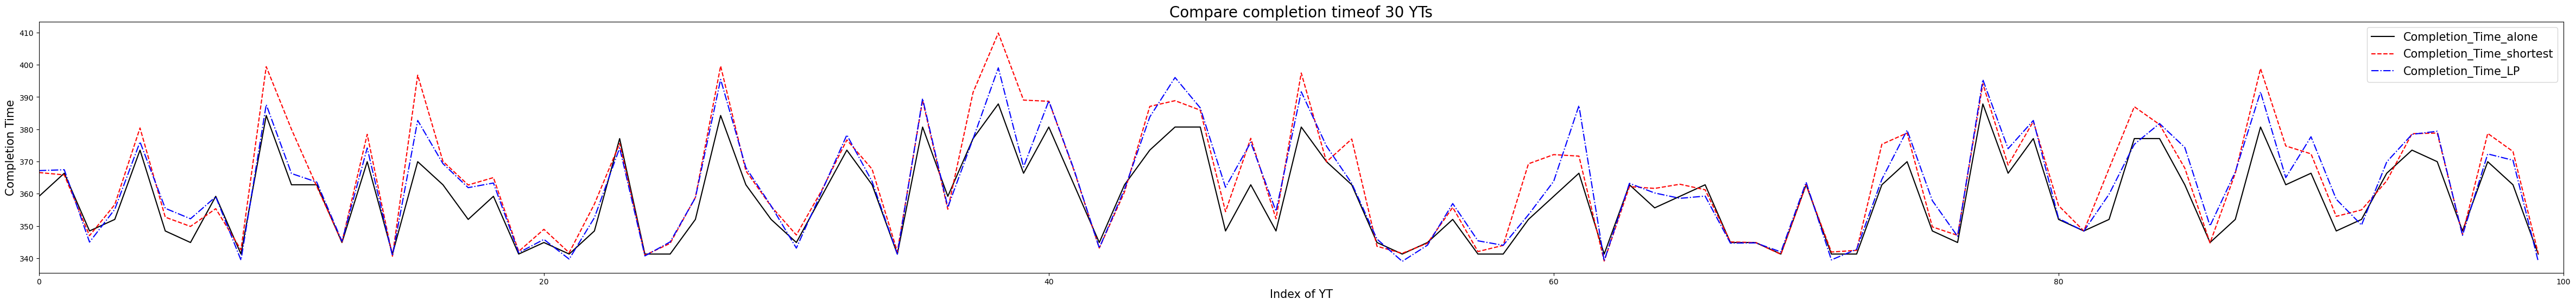

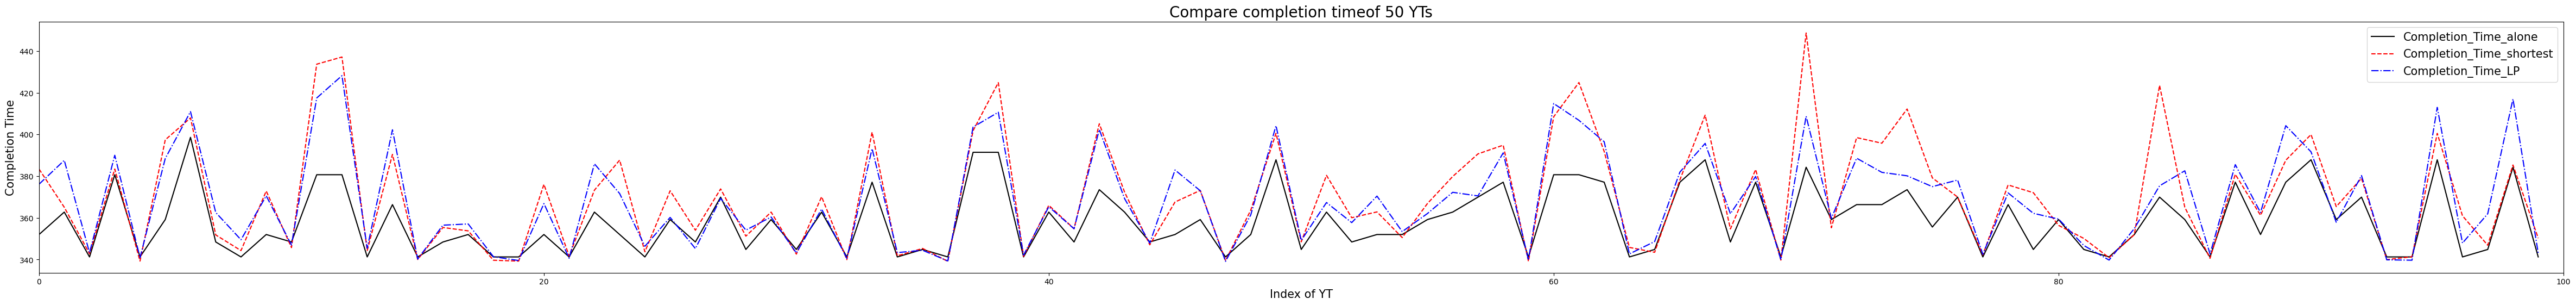

In [72]:
x_label = 'Index of YT'
y_label = 'Completion Time'
title = 'Compare completion time'

completion_time_plot(yt_10_random_df, x_label, y_label, title + 'of 10 YTs', random_num)
completion_time_plot(yt_30_random_df, x_label, y_label, title + 'of 30 YTs', random_num)
completion_time_plot(yt_50_random_df, x_label, y_label, title + 'of 50 YTs', random_num)

In [94]:
y_col = ['Congestion_ratio','Completion_Time']
c_dfs = f.get_dfs_by_folder(folder_path, y_col, True, y_col[0])
c_dfs

Remove outliers by  Congestion_ratio !


[('prev_5_now_5',
       Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
  0                    5                5        0        0      100   
  1                    5                5        0        0      100   
  2                    5                5        0        0      100   
  3                    5                5        0        0      100   
  4                    5                5        0        0      100   
  ...                ...              ...      ...      ...      ...   
  6376                 5                5       80       10       10   
  6377                 5                5       80       10       10   
  6378                 5                5       80       10       10   
  6379                 5                5       80       10       10   
  6380                 5                5       80       10       10   
  
        repeat_num  Congestion_ratio Completion_Time  
  0              1         -0.030833         339.992  
  1  

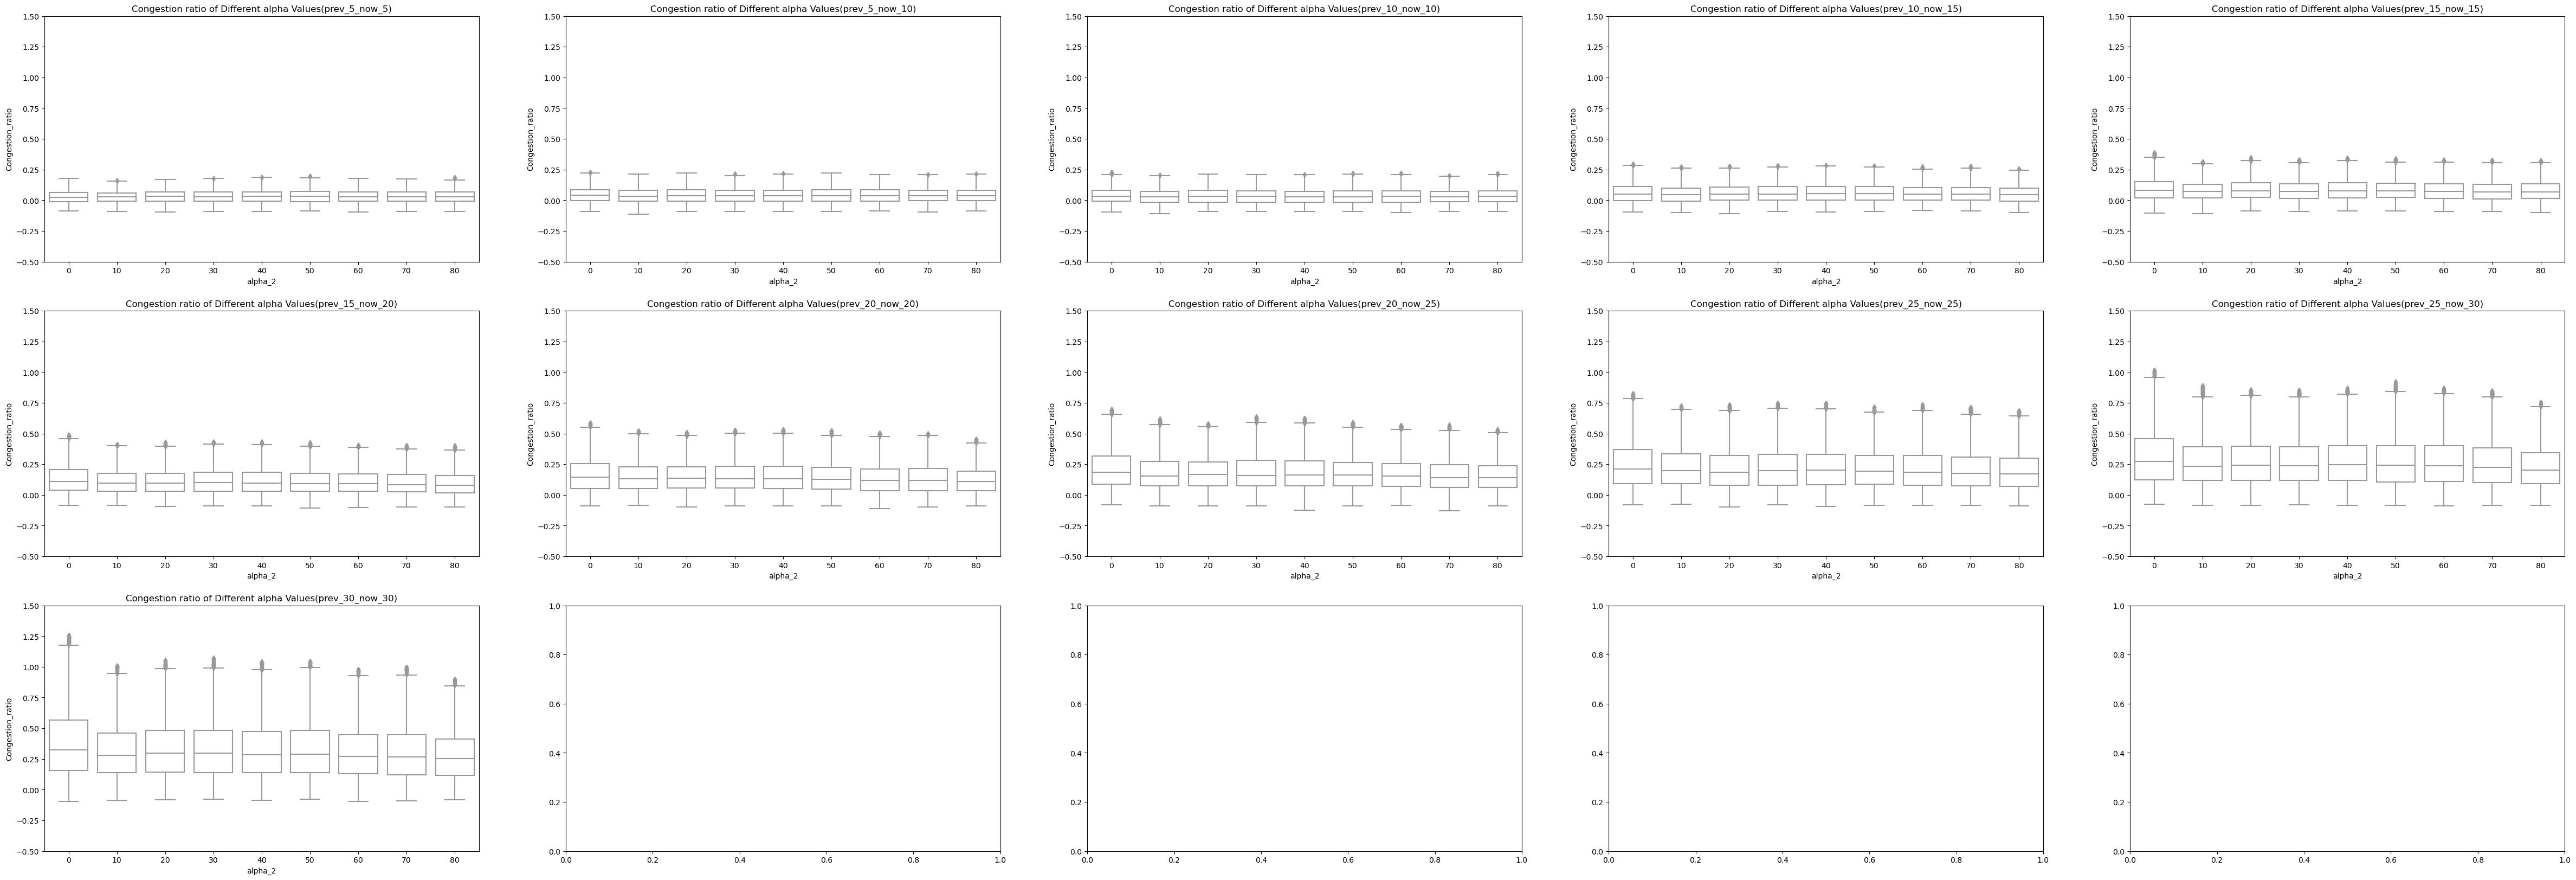

In [98]:
new_completion_dfs = f.to_numeric(c_dfs, 'Congestion_ratio')
title = 'Congestion ratio of Different alpha Values'
fig_size = (60, 20)
y_lim = (-0.5, 1.5)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Congestion_ratio', col_num, y_lim, title, fig_size)

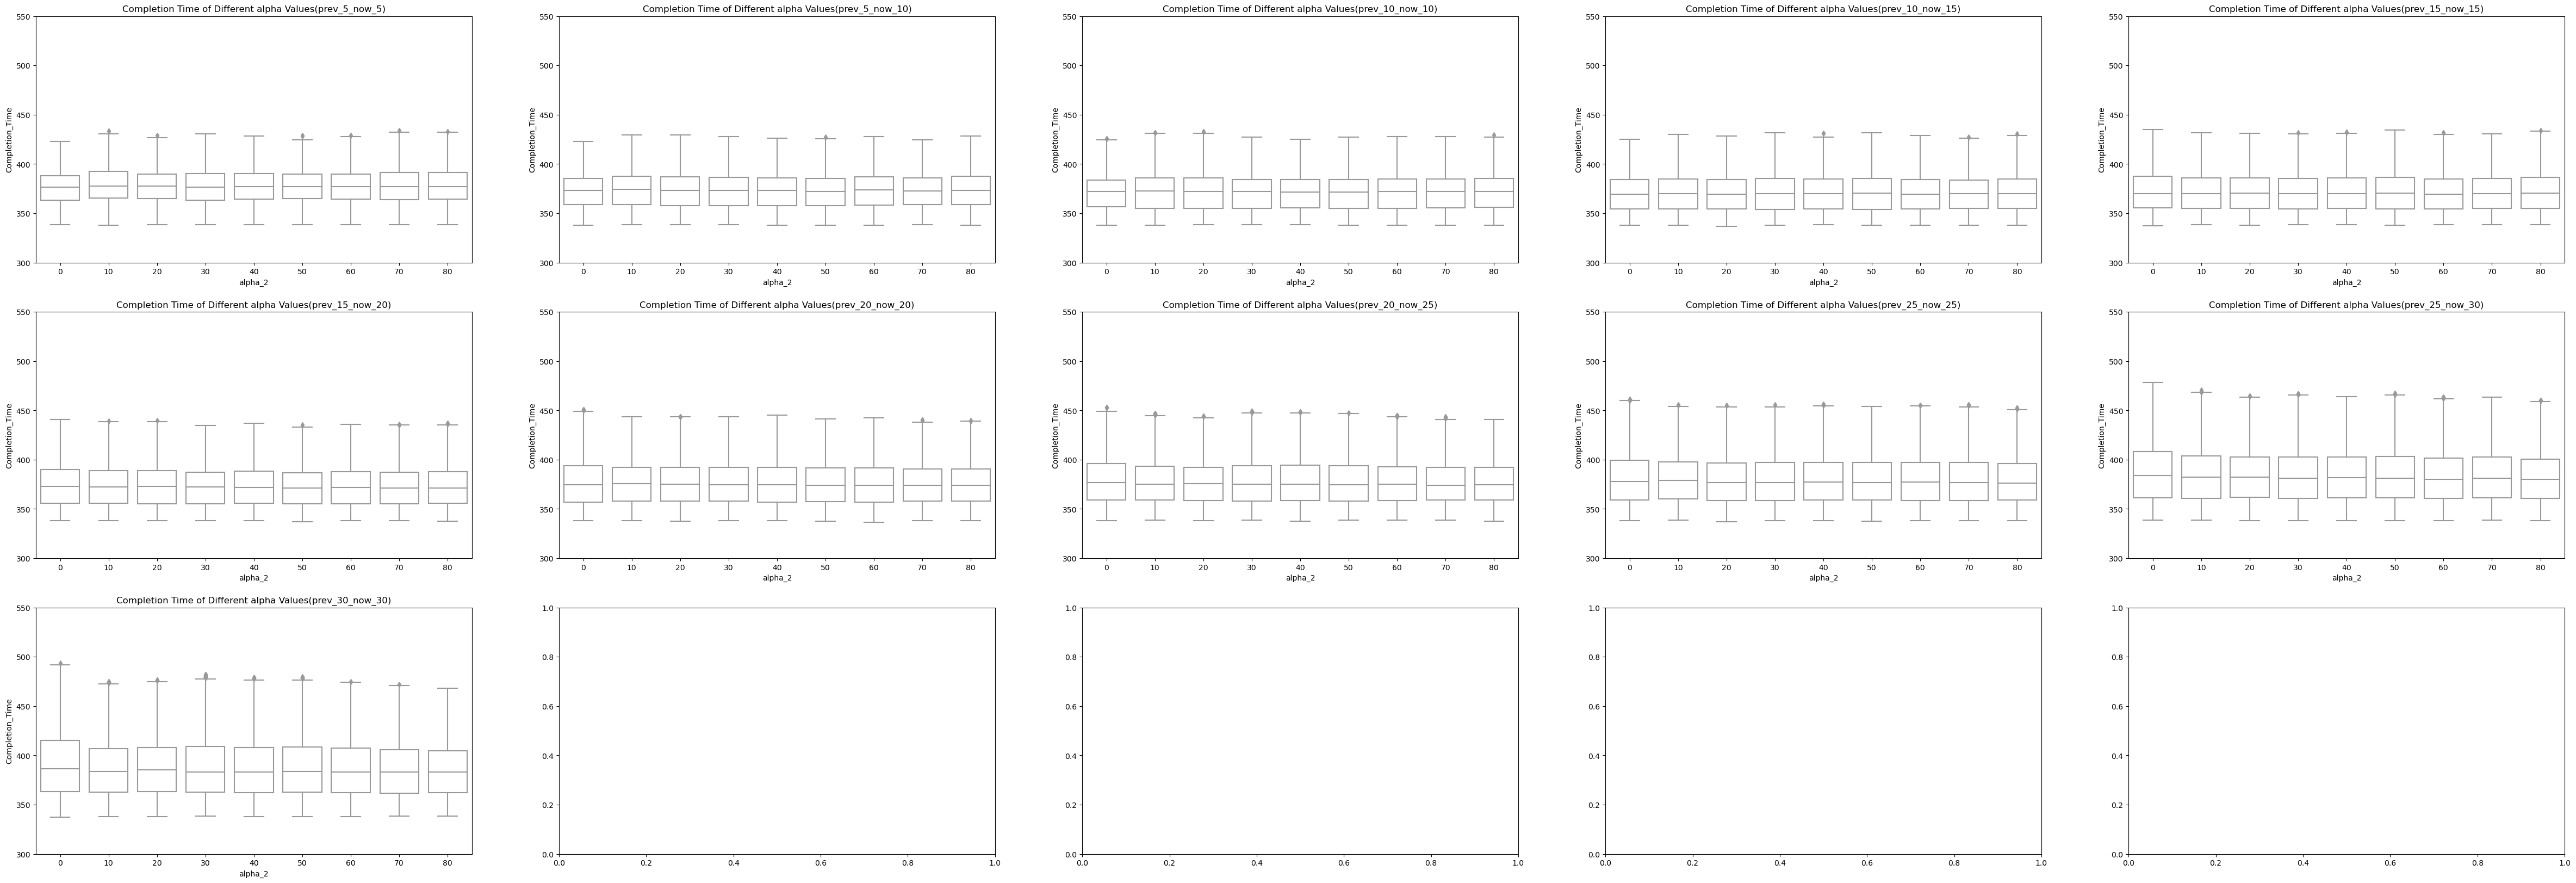

In [93]:
new_completion_dfs = f.to_numeric(c_dfs, 'Completion_Time')
title = 'Completion Time of Different alpha Values'
fig_size = (60, 20)
y_lim = (300, 550)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Completion_Time', col_num, y_lim, title, fig_size)

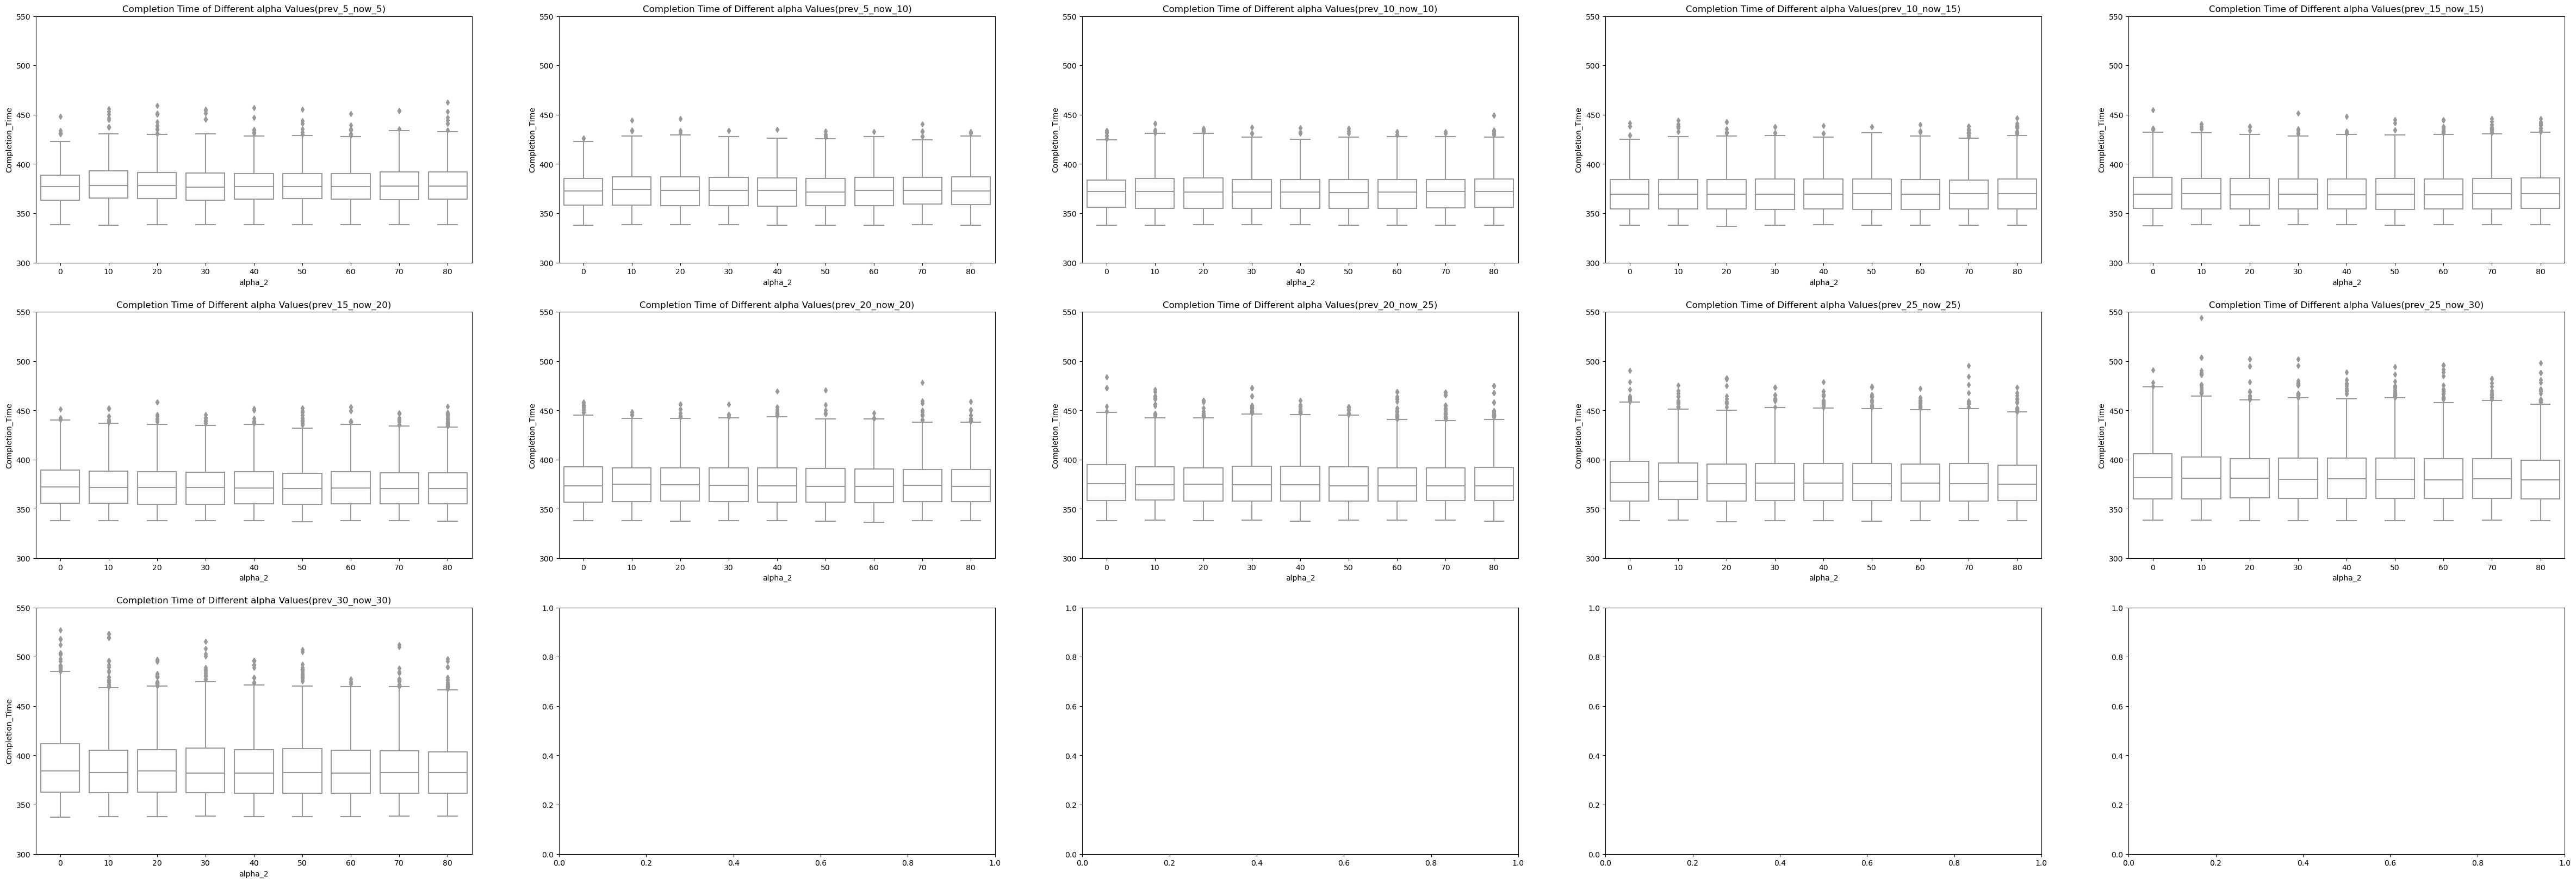

In [84]:
new_completion_dfs = f.to_numeric(completion_dfs, 'Completion_Time')
title = 'Completion Time of Different alpha Values'
fig_size = (60, 20)
y_lim = (300, 550)
col_num = 5 

f.boxsubplot(new_completion_dfs, 'alpha_2', 'Completion_Time', col_num, y_lim, title, fig_size)

min :  -0.02141301 max :  0.08137266
min :  -0.00988983 max :  0.102573
min :  0.008598832 max :  0.1048616
min :  0.01331389 max :  0.12797
min :  0.03474983 max :  0.1949623
min :  0.06808501 max :  0.2458637
min :  0.1046267 max :  0.3288693
min :  0.1287529 max :  0.4139599
min :  0.1806052 max :  0.3829392
min :  0.2286355 max :  0.4311388
min :  0.2462635 max :  0.5731369


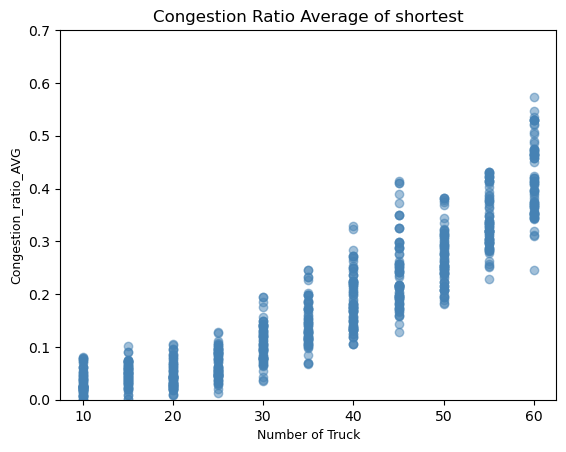

In [ ]:
x_col = ['Prev Truck Number', 'Now Truck Number']
y_lim = (0, 0.7)
y_col = ['Congestion_ratio_AVG']
x_value = []
shortest_dfs = {}
x_label = 'Number of Truck'
legend_loc = 'upper left'
title = 'Congestion Ratio Average of shortest'

for key, value in congestion_ratio_avg_dfs:
    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]

    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    print('min : ', shortest_df[y_col[0]].min(), 'max : ', shortest_df[y_col[0]].max())
    
f.scatterplot(shortest_dfs, x_value, x_label, y_col[0], y_lim, title, 'steelblue', False, legend_loc)

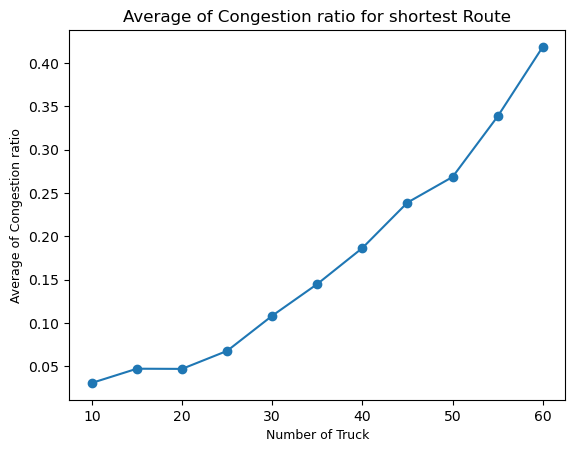

In [ ]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio_AVG'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Average of Congestion ratio for shortest Route')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()

Remove outliers by  Congestion_ratio !
min :  -0.08917192 max :  0.1778055
min :  -0.09343517 max :  0.2273001
min :  -0.09697974 max :  0.2251718
min :  -0.09546259 max :  0.2928661
min :  -0.1049242 max :  0.3838321
min :  -0.08636567 max :  0.4868526
min :  -0.08924523 max :  0.5872443
min :  -0.08222047 max :  0.696193
min :  -0.081784 max :  0.8253903
min :  -0.07635883 max :  1.015349
min :  -0.0948113 max :  1.254438


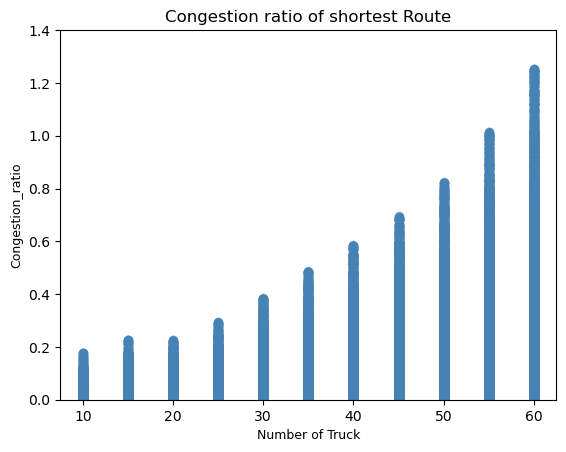

In [ ]:
title = 'Congestion ratio of shortest Route'

x_col = ['Prev Truck Number', 'Now Truck Number']
x_label = 'Number of Truck'
y_col = ['Congestion_ratio']
y_lim = (0, 1.4)
legend_loc = 'upper left'

dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
dfs = f.to_numeric(dfs, y_col[0])
x_value = []
shortest_dfs = {}
# get new df where alpha_1 = 0
for key, value in dfs:

    # get value of where alpha_1 = 0
    shortest_df = value[value['alpha_1'] == 0]
    x_value.append(shortest_df[x_col].iloc[0].astype(int).sum())
    shortest_dfs[key] = shortest_df
    
    print('min : ', shortest_df[y_col[0]].min(), 'max : ', shortest_df[y_col[0]].max())
    
f.scatterplot(shortest_dfs, x_value, x_label, y_col[0], y_lim, title, 'steelblue', False, legend_loc)

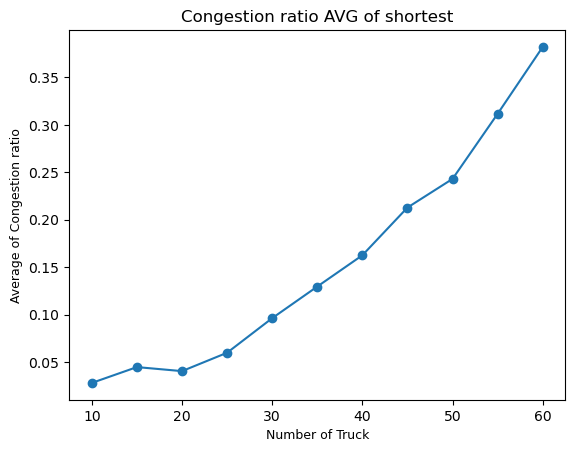

In [ ]:
y_value_list = []
for key, value in shortest_dfs.items():
        y_value_list.append(value['Congestion_ratio'].mean())

# draw line plot
plt.plot(x_value, y_value_list, marker='o', linestyle='-')                    

# Add labels and legend
plt.title('Congestion ratio AVG of shortest')
plt.xlabel(x_label, fontsize=9)
plt.ylabel('Average of Congestion ratio', fontsize=9)

plt.show()
        

In [ ]:
# title = 'Congestion ratio average of LP'

# x_col = ['Prev Truck Number', 'Now Truck Number']
# y_col = ['Congestion_ratio']
# y_lim = (0, 0.5)

# dfs = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier=y_col[0])
# dfs = f.to_numeric(dfs, y_col[0])
# print(dfs)

Remove outliers by  Congestion_ratio !
[('prev_5_now_5',      Prev Truck Number Now Truck Number  alpha_1  alpha_2  alpha_3  \
0                    5                5        0        0      100   
1                    5                5        0        0      100   
2                    5                5        0        0      100   
3                    5                5        0        0      100   
4                    5                5        0        0      100   
...                ...              ...      ...      ...      ...   
1050                 5                5       80       10       10   
1051                 5                5       80       10       10   
1052                 5                5       80       10       10   
1053                 5                5       80       10       10   
1054                 5                5       80       10       10   

      repeat_num  Congestion_ratio  
0              1         -0.030833  
1              1         -0.

Remove outliers by  Congestion_ratio !


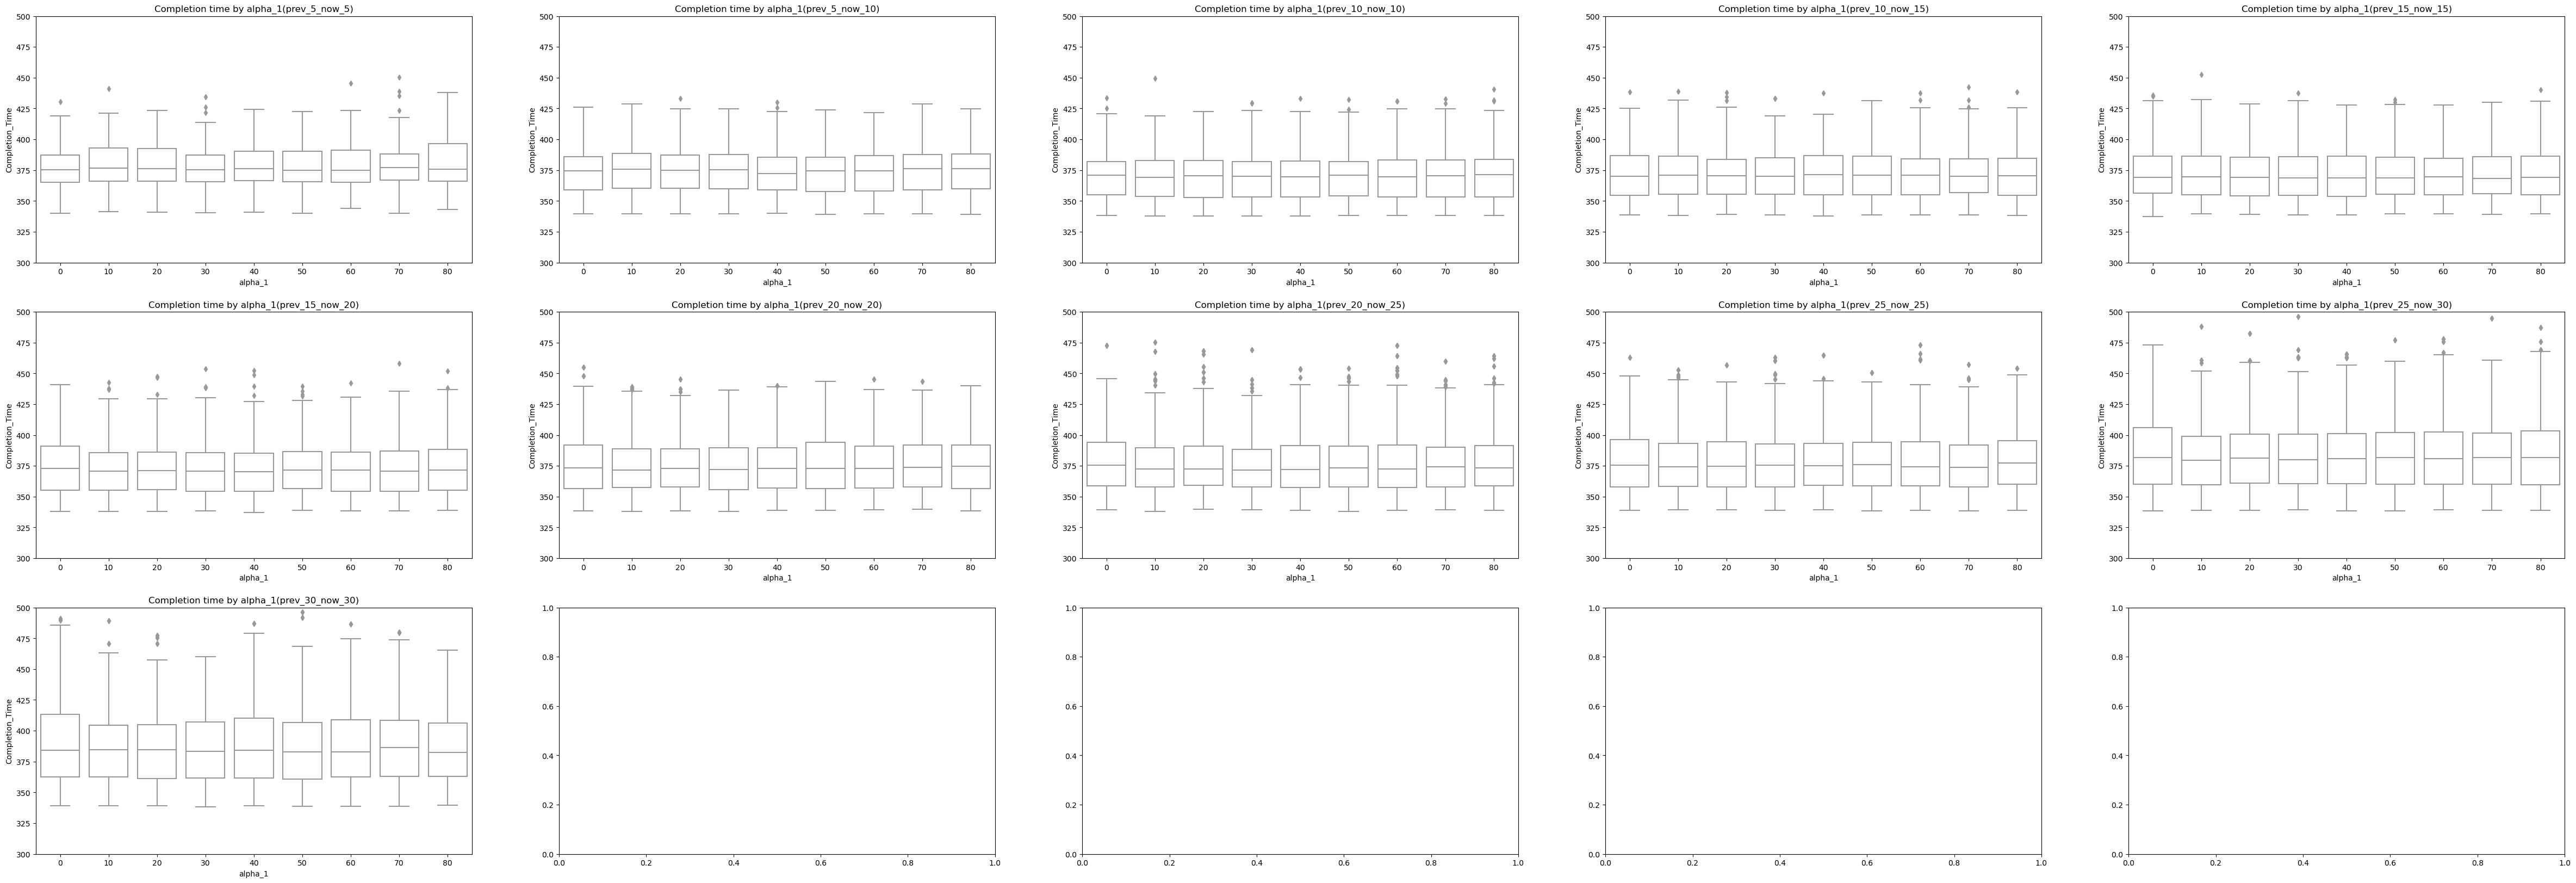

In [ ]:
# folder_path = 'results'
# x_col = 'alpha_1'
# y_col = ['Congestion_ratio', 'Completion_Time']
# col_num = 5
# y_lim = (300, 500)
# fig_size = (60, 20)
# title = 'Completion time by alpha_1'

# remove_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
# remove_df = f.to_numeric(remove_df, y_col[1])
# f.boxsubplot(remove_df, x_col, y_col[1], col_num, y_lim, title, fig_size)

### Travel Time by Distance

In [ ]:
folder_path = 'Results'
y_col = ['Congestion_ratio', 'TravelTime_by_Distance']

travel_df = f.get_dfs_by_folder(folder_path, y_col, True, standard_outlier = y_col[0])
travel_df = f.to_numeric(travel_df, y_col[1])

Remove outliers by  Congestion_ratio !


In [ ]:
def lineplot(_dfs, x_col_1, x_col_2, y_col, y_lim, _title):
    keys = []
    
    # Define a list of markers
    markers = ['o', 's', '^', 'D', 'v', 'p', 'h', 'x', '+', '*']
    
    # Use cycle to create a cycling iterator for markers
    marker_cycle = cycle(markers)
    
    for key, value in _dfs:
        # keys.append(key)
        keys.append(int(value['Prev Truck Number'][0]) + int(value['Now Truck Number'][0]))
        # get average of group by alpha_1, alpha_2, alpha_3
        df = value.groupby([x_col_1, x_col_2])[y_col].mean().reset_index()
        x_value = df[x_col_1]
        y_value = df[y_col]
        
        # Get the next marker from the cycle
        marker = next(marker_cycle)
        
        # Plot the line with the specified marker
        plt.plot(x_value[1:], y_value[1:], marker=marker, label=key)

    
    plt.title(_title, fontsize=12)
    plt.xlabel(x_col_1, fontsize=9)
    plt.ylabel(y_col, fontsize=9)
    plt.legend(keys, title = 'Number of YT', title_fontsize = 6, fontsize=6, loc='upper right')
    # set y limit
    plt.ylim(y_lim)

    # Create a secondary x-axis
    ax2 = plt.gca().secondary_xaxis('top')
    
    # Customize the secondary x-axis using the values from the specific column
    if x_col_2 in df.columns:
        ax2.set_xlabel(x_col_2, fontsize=9)
        ax2.set_xticklabels(df[x_col_2])
    
    for key, value in _dfs:
        df = value.groupby([x_col_1])[y_col].mean().reset_index()
        y_value = df[y_col]
        plt.axhline(y=y_value[0], linestyle='--', color ='gray' ,alpha=0.5)
    
    plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_24260\4090030313.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df[x_col_2])


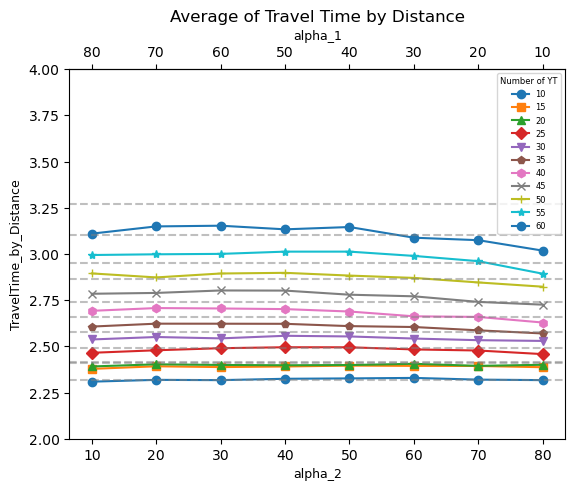

In [ ]:
x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
title = 'Average of Travel Time by Distance'

lineplot(travel_df, x_col_1, x_col_2, y_col[1], y_lim, title)

C:\Users\USER\AppData\Local\Temp\ipykernel_24260\4090030313.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df[x_col_2])


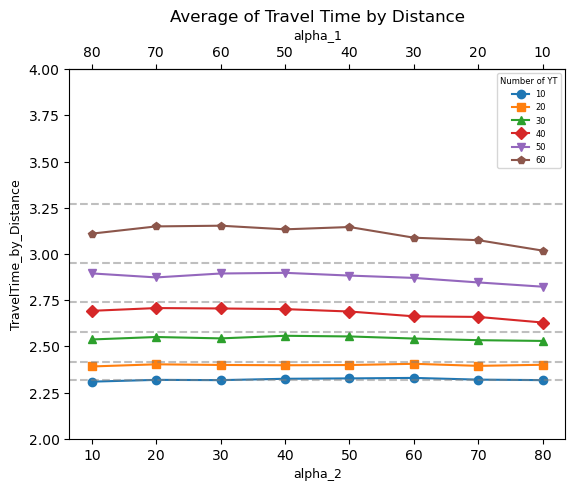

In [ ]:
# Given key_list
key_list = ['prev_5_now_5', 'prev_10_now_10', 'prev_15_now_15', 'prev_20_now_20', 'prev_25_now_25', 'prev_30_now_30']

# Initialize an empty list to store the selected DataFrames
selected_dfs = []

# Iterate through travel_df
for key, df in travel_df:
    if key in key_list:
        # Append the matching DataFrame to the selected_dfs list
        selected_dfs.append((key, df))

x_col_1 = 'alpha_2'
x_col_2 = 'alpha_1'
title = 'Average of Travel Time by Distance'

lineplot(selected_dfs, x_col_1, x_col_2, y_col[1], y_lim, title)

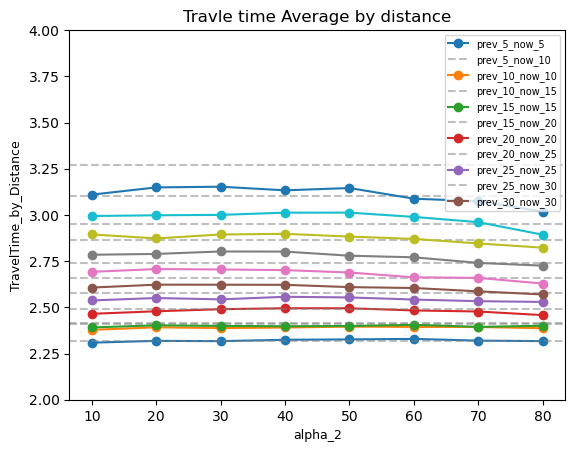

In [ ]:
x_col = 'alpha_2'
y_lim = (2, 4)

lineplot(travel_df, x_col, y_col[1], y_lim, title)